In [41]:
##Importing Pertinent Libraries
import operator
import re
import pandas as pd
import numpy as np
import itertools  
from pprint import pprint 
import statistics 
import matplotlib.pyplot as plt
import matplotlib.figure
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
from country_list import countries_for_language


In [42]:
##Installing the external Libraries
! pip install WordCloud
! pip install country-list


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Declaring all functions to perform data analysis

In [43]:

# def scopus_func(arr,j,k,rr):
#     i=k
#     alist=[]
#     while(i<rr):
#         try:
# #             print(arr[j][i])
#             alist.append(arr[j][i])
            
#         except:
# #             print("Vdv")
#             alist.append("-")
            
#         i=i+1
#     return alist

def citationauthors():
    #This represents the number of citations for each author for all the papers published by them in that specific domaibn
    aasa=dict(sorted(citcount2.items(), key=operator.itemgetter(1),reverse=True))## sorting the result
    global res
    res = dict(list(aasa.items())) ##Storing the results in a storage dictionary
    results['NoOfCitstionsPerAuthor']=res
#     print(res)

def calc_hindex(citations): 
#     Calculating thr H index for 1 author
    # sorting in ascending order 
    citations.sort() 
    # iterating over the list 
    for i, cited in enumerate(citations): 
        
        # finding current result 
        result = len(citations) - i 
          
        # if result is less than or equal 
        # to cited then return result 
        if result <= cited: 
            return result 
           
    return 0
def calc_gindex(citations): 
    #Calculating thr G index for 1 author
    citations.sort(reverse=True) 
#     print(citations)
    length=len(citations)
    for i in range(0,length-1):
        length2=length-i
        sumcount=sum(citations[0:length2])
        if(sumcount>=length2*length2):
#             print(length2)
            return length2
    return 0
def calc_i10index(citations):
    #Calculating thr i10 index for 1 author
    count=0
    citations.sort(reverse=True)
    length=len(citations)
    for i in range(0,length-1):
        if(citations[i]>=10):
            count=count+1
    return count
def Hindex():
    # Calculating various evaluation matrix like , Gindex, i10 index, H index for all authors
    for val in citcount2:
        l=citcount[val]
        if(len(l)):
            hindexlist[val]=calc_hindex(l)
            gindexlist[val]=calc_gindex(l)
            
            i10indexlist[val]=calc_i10index(l)
def unique():
    ##Number of authors for the paper
    ##First author for all the papers
    ##Number of papers with a single author and their author names
    ##Citation count for all papers published by individual authors
    for ind in df.index:     
        c=df['Authors'][ind]
        l2=re.split("[;,]",c)
        l2 = [x.strip() for x in l2]
        if (l2[0]=="-"):
            var.append('-;'+ str(int(df['Year'][ind]))+  ' ; '+df['Source title'][ind])
            continue;
        firstauthor.append(l2[0])##First author for all the papers
        var=l2[0]+' ; '+str(int(df['Year'][ind]))+' ; '+df['Abbreviated Source Title'][ind] ##First author name along with year and abbreviated source title
        srdff.append(var)
        df.at[ind,'NoOfAuthors']=len(l2)
        if(len(l2)==1) :
            sigleauthored.extend(l2)##Number of papers with a single author and their author names
        for each in l2:
            if each in di.keys():
                di[each]=di[each]+(1/len(l2))
                d2[each]=d2[each]+1
                citcount[each].append(df['Cited by'][ind])##Number of papers with a single author and their author names
                citcount2[each]=citcount2[each]+df['Cited by'][ind]
            else:
                di[each]=1/len(l2)
                d2[each]=1
                authorlist.append(each)
                citcount[each]=[df['Cited by'][ind]]
                citcount2[each]=df['Cited by'][ind]
    
        nAUperPaper.append(len(l2))

def yearfunc():
    # Intializing the function yearfunc to determine to perform data analysis on year related data such as
    #in which year the article has been cited,
    # for how long has it been in discussion
    #the name of the authors, 
    #number of papers published in 1 year
    results['RangeYear']=int(df['Year'].max()-df['Year'].min())
#     results['Years']=year
    for ind in df.index:
        each=df['Year'][ind]
        var2=df['Cited by'][ind]
        if each in distictyear.keys():
            distictyear[each]=int(distictyear[each]+1)
            citationperyear[each]=int(citationperyear[each]+var2)
        else:
            distictyear[each]=1
            citationperyear[each]=int(var2)

    results['DictictYears']=distictyear
    

def citationpaper():
    # Performing data analysis on the citationa data available along with all the pertinent information; 
    yearnow=pd.datetime.now().year
    for i in range(len(df)):
        var=df["Cited by"][i]/(yearnow-df["Year"][i]+1)
        TCitationsperYear.append(var)
    citationdf['SR']=df['SR']
    citationdf['DOI']=df['DOI']
    citationdf['TC']=df['Cited by']
    citationdf['TCPY']=TCitationsperYear
    citationdf['Year']=df['Year']
    citationdf['Title']=df['Title']
def refrencesfunc():
    # Performing data analysis on the references data like the list and count of references of each paper available along with all the pertinent information; 
    for ind in df.index:
        ac=df['References'][ind]
        l2=re.split(";",ac)
        each=l2[0]
        if(each=="-"):
            reflist.append('-')
            refcount.append(0)
        else:
            l=each.split(';')
            reflist.append(l2)
            refcount.append(len(l2))
    results['RefrenceList']=reflist
    results['RefrenceCount']=sum(refcount)

def conv3():
    #Calculating the total citations for each source
    for ea in topsources.index:
        z=int(sourcescitations[ea])
        topsources.at[ea,'Total Citations']=int(z)

def sources():
    # Performing data analysis on all the sources available and use them to determine the total citation and article count 
    symbols = df.groupby('Source title')
    global topsources
    global sourcescitations
    global sourcelist
    topsources=symbols['EID'].agg(np.count_nonzero)
    topsources=topsources.sort_values(ascending=False)
    sourcescitations=symbols['Cited by'].sum()
    sourcescitations=sourcescitations.sort_values(ascending=False)
    topsources=topsources.to_frame()
    conv3()
    topsources=topsources.rename(columns={'EID': 'Article Count'})


def createdf():
    ## Creating a dataframe from a list about the total info of each author
    author['Name']=authorlist
    i=0
    for e in authorlist:
        author.at[i,'PaperCount']=d2[e]
        author.at[i,'AuthorFrac']=di[e]
        author.at[i,'CitationCount']=citcount2[e]
        author.at[i,'Hindex']=hindexlist[e]
        author.at[i,'Gindex']=gindexlist[e]
        author.at[i,'I10index']=i10indexlist[e]
        
        i=i+1
    i=0
  
    for ea in distictyear:
        dfyear.at[i,'Year']=int(ea)
        z=int(distictyear[ea])
        x=int(citationperyear[ea])
        dfyear.at[i,'Article Count']=z
        dfyear.at[i,'Citation Count']=x
        dfyear.at[i,'Avg Citations per Article']=x/z
        
        i=i+1
def conv():
    ##Declaring the fractionalize citation count for all the author related keyword
    for ea in dfauth.index:
        val=dfauth['Keyword'][ea]
        z=int(totalcitationsauthkeywords[val])
        dfauth.at[ea,'Total Citations']=z
        x=z/dfauth["Articles"][ea]
        dfauth.at[ea,'Fractionalized Citation Count']=x
def conv2():
    ##Declaring the fractionalize citation count for all the paper related keyword
    for ea in dfind.index:
        val=dfind['Keyword'][ea]
        z=int(totalcitationsindkeywords[val])
        dfind.at[ea,'Total Citations']=z
        x=z/dfind["Articles"][ea]
        dfind.at[ea,'Fractionalized Citation Count']=x
def doc():
    ##Performing analysis on the different document types present in the dataset like article, book chapter, review, etc
    global doctypecount
    doctype = df.groupby('Document Type')
    doctypecount=doctype['Document Type'].agg(np.count_nonzero)
    papercount=df.shape[0]/1000
    if(papercount<10):
        papercount=10
    othercount=0
    for each in doctypecount.keys():
#         print(each)
        if(doctypecount[each]<=papercount):
            othercount=othercount+doctypecount[each]
            del doctypecount[each]
    doctypecount['Others']=othercount
#     print(doctypecount)
def affiliation():
    ##Determing the affiliatiion count and the affiliation fractinalized count for all the affiliated authors and also calculating the first author affiliation count
    for ind in df.index: 
        q=df['Authors with affiliations'][ind].split(';')
        name=q[0].split(',')[0]
        
        c=df['Authors'][ind]
        l2=(re.split("[;,]",c))
        l2 = [x.strip() for x in l2]
        if (l2[0]=="-"):
            continue;
        
        list1.append(name)

        for each in q:
            if each in a1.keys():
                a1[each]=a1[each]+(1/len(q))
                a2[each]=a2[each]+1
            else:
                a1[each]=1/len(q)
                a2[each]=1

                
                
    global affCount
    global affFrac
    affCount=dict( sorted(a2.items(), key=operator.itemgetter(1),reverse=True))    
    affFrac=dict( sorted(a1.items(), key=operator.itemgetter(1),reverse=True))    
    i=0
    
    for e in firstauthor:
        firstAuthAff[e]=list1[i]
        i=i+1
        
    results['AffiliationCount']=affCount
    results['AffiliationFractionalized']=affFrac
    results['FirstAuthAff']=firstAuthAff

    
def country():
    ##Performing data analysis on all the countries where papers were published 
    #and using that to evaluate
        #Avg Article Citations
        #Total Citations
        #Article Count
    #Also to determine if there was any collaboration of authprs of different countries and hence checking the multi country publication
        #Country_Name
        #Article Count
        #SCP
        #MCP
        #MCP_Ratio
        #Frequency
    
    # Trying to find Country
    for ind in df.index:
        i=df['Authors with affiliations'][ind]
        w=df['Cited by'][ind]
        if(i=='-' or len(i)==0):
            continue
        d=i.split(';')
        dd=d[0].split(',')
        lendd=len(dd)
        var=dd[lendd-1]
        var=str.strip(var)
        firstauthorcountry.append(str.strip(var))
        if var in countrycount.keys():
            countrycount[var]=countrycount[var]+1
            countrycitation[var]=countrycitation[var]+w
        else:
            countryname.append(str.strip(var))
            countrycount[var]=1
            countrycitation[var]=+w
            singlecountry[str.strip(var)]=0
            multicountry[str.strip(var)]=0
        conuntryval=var
        tempcountlist=[]
        flag=0
        for value in d:
            c=value.split(',')
            length=len(c)
            var2=c[length-1]
            tempcountlist.append(str.strip(var2))

        tempcountlist = [value for value in tempcountlist if value in countries] 
        tempcountlist=uniquel(tempcountlist)
       
                
            
        if (len(tempcountlist)==1):
            if tempcountlist[0] in singlecountry.keys():
                countrydf2.at[tempcountlist[0],'SCP']=countrydf2.at[tempcountlist[0],'SCP']+1
                countrydf2.at[tempcountlist[0],'Article Count']=countrydf2.at[tempcountlist[0],'Article Count']+1
        else:
            for i in tempcountlist:
                if i in multicountry.keys():
                    countrydf2.at[i,'MCP']=countrydf2.at[i,'MCP']+1
                    countrydf2.at[i,'Article Count']=countrydf2.at[i,'Article Count']+1
    
            tlist.append(tempcountlist)
        
    countrydf['Name']=countryname
    
    i=0
    for ind in countryname:
        a=countrycitation[ind]
        b=countrycount[ind]
        countrydf.at[i,'Avg Article Citations']=a/b
        countrydf.at[i,'Total Citations']=a
        countrydf.at[i,'Article Count']=b
        i=i+1
    
        
        
    sumvar=sum(countrydf2['Article Count'])
    for i in countrydf2.index:
#        
        b=countrydf2.at[i,'Article Count']
#         
        countrydf2.at[i,'Frequency']=float(b/sumvar)
        a=countrydf2.at[i,'SCP']
        c=countrydf2.at[i,'MCP']
#         
        if a==0:
            countrydf2.at[i,'MCP_Ratio']=0.0
        else:
            countrydf2.at[i,'MCP_Ratio']=float(c)/float(a)
        




def keywords():
    ##Determining all the author related keywords to understand what topics the authors researches in
    global distinctauthkey
    for ind in df.index:
        c=df['Author Keywords'][ind]
        cit=df['Cited by'][ind]
        l2=re.split(';',c)
#         for e in l2:
#             print(e.strip())
        l2 = [x.strip().upper() for x in l2]
        if (l2[0]=="-"):
            authorkeywords.append('-')
            continue
        authorkeywords.append(l2)
        for each in l2:
            if each in distinctauthkey.keys():
                distinctauthkey[each]=distinctauthkey[each]+1
                totalcitationsauthkeywords[each]=totalcitationsauthkeywords[each]+cit
            else:
                distinctauthkey[each]=1
                totalcitationsauthkeywords[each]=cit
                
def keywordsind():
    #Determining all the paper related keywords to understand what keywords the paper revolves about
    global distinctindexkey
    for ind in df.index:  
        d=df['Index Keywords'][ind]
        cit=df['Cited by'][ind]
        l3=re.split(';',d)
#         for e in l2:
#             print(e.strip())
        l3 = [x.strip().upper() for x in l3]
        if (l3[0]=="-"):
            indexkeywords.append('-')
            continue
        indexkeywords.append(l3)
        for each in l3:
            if each in distinctindexkey.keys():
                distinctindexkey[each]=distinctindexkey[each]+1
                totalcitationsindkeywords[each]=totalcitationsindkeywords[each]+cit
            else:
                distinctindexkey[each]=1
                totalcitationsindkeywords[each]=cit
def uniquel(list1):
    #Creates a unique list of all the records
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(str.strip(x)) 
    # print list 
    return  unique_list

def convertfunc():
    #Function performing data prepreprocessing on the extracted data, making it ready for analysis
    
    df["Year"].fillna(0, inplace = True) 
    df["Volume"].fillna(0, inplace = True) 
    df["Issue"].fillna(0, inplace = True) 
    df["Art. No."].fillna(0, inplace = True) 
    df["Page start"].fillna(0, inplace = True) 
    df["Page end"].fillna(0, inplace = True) 
    df["Page count"].fillna(0, inplace = True) 
    df["Cited by"].fillna(0, inplace = True) 
    df.fillna('-',inplace=True)
    df['Authors'] = df['Authors'].str.upper()
    df["Authors"]= df.apply(lambda x: x['Authors'].replace('.', ''), axis=1)
    df["Authors"]= df["Authors"].replace(',', ';', regex = True)
    df['Authors with affiliations'].fillna('-',inplace=True)   
def analysis(df):
    results['Articlecount']=df.shape[0]  

    

#  print('\n\nTOP 15 AUTHORS WITH HIGHEST CITATIONS AMONGST ALL PAPERS\n')
#     citation('author',15)
#     print('\n\nTOP 15 ARTICLES WITH HIGHEST CITATIONS AMONGST ALL PAPERS\n')
#     citation('article',15)
#     print('\n\nMOST IMPACTFUL ARTICLES BASED ON CITATIONS OVER EVERY YEAR\n')
#     articles(5)
#     print('\n\ABILITY TO SEARCH INFO FOR A PARTICULAR AUTHOR\n\n')
#     author_details(name='WANG Y')
#     print('\n\nABILITY TO SEARCH INFO FOR A PARTICULAR AUTHOR USING AUTHOR ID\n')
#     author_details(name=57208348441)
#     print('\n\nDELINEATING THE AUTHOR DETAILS FOR EVERY AUTHOR BASED ON THEIR PAPER COUNT\n')
#     author_details()
#     print('\n\nALL DETAILS OF PAPERS PUBLISHED BY A SPECIFIC AUTHOR\n')
#     author_paper_analysis('WANG Y')
#     print('\n\nDELINEATING THE ARTICLE DETAILS FOR EVERY ARTICLE\n')
#     article_details()
#     print('\n\nDELINEATING ARTICLE DETAILS USING ARTICLE ID \n')
#     article_details('10.1093/cvr/cvaa')
    

    
def citation(mode="author",k=10):
    #Searching for citation details based on different search parameters
    lista=[]
    if(mode=="article"):
        for i in range(0,k):
            var=citationdf['SR'][i]
            var+=citationdf['DOI'][i]
            lista.append(var)
        df111=pd.DataFrame()
        df111['Article Name']=lista
        df111['Citation Count']=citationdf['TC'][0:k].tolist()
        print(df111)
        
    elif(mode=="author"):
        out=dict(list(results['NoOfCitstionsPerAuthor'].items())[0: k])
        out = sorted(out.items(), key=operator.itemgetter(1),reverse=True)
        pprint(out)
def articles(k=10):
    #Diplaying the most impactful articles based on citation counts per year
    print('\n\nMOST IMPACTFUL ARTICLES BASED ON CITATIONS \n')
    print(citationdf[0:k].to_string(index=False))
    
def author_details(name="*"):
    #Searching for author details based on different search parameters
    if(name=="*"):
        print(author.head(10))
        
        
    elif (isinstance(name, int)):
        for ind in df.index: 
            var3=''
            c=df['Author(s) ID'][ind]
            l2=re.split("[;,]",c)
            l2 = [x.strip() for x in l2]
            d=df['Authors'][ind]
            l3=re.split("[;,]",d)
            l3 = [x.strip() for x in l3]
            if (l2[0]=="-"):
                continue;
            for each,each2 in zip(l2,l3):
                try:
                    if(each==''):
                        each=0
                    if(int(each)==name):
                        print(each2)
                except:
                    continue
                      
            
    else:
        name.strip().upper()
        print(author.loc[author['Name'] .str.contains(name)])
        
def author_paper_analysis(name="*"):
    #Searching for each paper details for the inputed author 
    if(name=="*"):
        print("Give author name nin function")
        return
    else:
        name.strip().upper()
        print('\nPAPERS PUBLISHED BY AUTHOR \n\n')
        ab=[]
        b=[]
        ce=[]
        d=[]
        e=[]
        for ind in df.index: 
            index2=0
            c=df['Authors'][ind]
            l2=(re.split("[;,]",c))
            l2 = [x.strip() for x in l2]
            if (l2[0]=="-"):
                continue;
            if (name in l2):

                ab.append(l2)
                b.append(df['Title'][ind] )
                ce.append(df['Source title'][ind] )
                d.append(df['Year'][ind])
                e.append(df['Cited by'][ind])
    #             index2=index2+1
        citationarray['Authors']=ab
        citationarray['Title']=b
        citationarray['Source']=ce
        citationarray['Year']= d
        citationarray['Citations']=e
        print(citationarray.sort_values(by=['Year','Citations'], ascending=(False,False)))
def article_details(name="*"):
    #Printing relevent article details for the author
    if(name=="*"):
        print(citationdf.head(10))
    else:
        name=name.strip()
        print(citationdf.loc[citationdf['DOI'].str.contains(name)])


In [44]:
##Importing country names and creating a dictionary
countries_dict = dict(countries_for_language('en'))
countries=[]
for key in countries_dict.values():
    countries.append(key)


## Importing dataset and preprocessing
#### Importing dataset and performing some pre-processing to make data ready for Analysis

In [45]:
##Importing the main dataset and calling the function to initialize the required variables
df=pd.read_csv(r'C:\Users\13412\Downloads\combined_covid (1).csv')
convertfunc()

C:\Users\13412\AppData\Local\Temp\ipykernel_29496\979462878.py:2: DtypeWarning: Columns (22,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\13412\Downloads\combined_covid (1).csv')


#### Declaring all global variables for storing results

In [46]:
##Declaring all the empty dictionaries and lists for us to store the subsequent results into
results={}
l=[] 
di={} # authors name with fractionalized value
d2={} # authors name with no of papers published
firstauthor=[]
sigleauthored=[]
year=df['Year'].tolist()
distictyear={}
TCitationsperYear=[]
citationdf=pd.DataFrame()
reflist=[]
refcount=[]
author=pd.DataFrame(columns=['Name','PaperCount','AuthorFrac'])
authorlist=[]
nAUperPaper=[]
citcount={}
firstAuthAff={}
aff={}
aff2={}
affFrac={}
list1=[]
res={}
aasa={}
a1={}
a2={}
firstauthorcountry=[]
countrycount={}
countrycitation={}
countrydf=pd.DataFrame()
countryname=[]
singlecountry={}
multicountry={}
countrydf2=pd.DataFrame()
citcount2={}
hindexlist={}
gindexlist={}
i10indexlist={}
citationarray=pd.DataFrame()
srdff=[]
citationperyear={}
dfyear=pd.DataFrame()
authorkeywords=[]
distinctauthkey={}
indexkeywords=[]
distinctindexkey={}
totalcitationsauthkeywords={}
totalcitationsindkeywords={}
countrydf2=pd.DataFrame({'Name':countries,
                        'Article Count':[0.0]*len(countries),
                        'SCP':[0.0]*len(countries),
                        'MCP':[0.0]*len(countries),
                        'MCP_Ratio':[0.0]*len(countries),
                         'Frequency':[0.0]*len(countries)
                       })
countrydf2.set_index(['Name'],inplace=True,drop=False)

tlist=[]


## Data Analysis and Preprocessing combined

Calling function to perform data analysis and generate the required results and store them accordingly

In [47]:
analysis(df)

# Calling the function yearfunc to determine the years in which year the article has been cited, 
# for how long has it been in diiscussion and the name of the authors
yearfunc()
   

#number of authors,paper count 
unique()
Hindex()
createdf()

df['SR']=srdff
d2 = sorted(d2.items(), key=operator.itemgetter(1),reverse=True)
di = sorted(di.items(), key=operator.itemgetter(1),reverse=True)

results['NoOfAuthors']=len(d2)
results['Authors']=d2
results['AuthorFrac']=di
results['FirstAuthors']=firstauthor
results['SingleAuthored']=sigleauthored
results['N_author_per_paper']=nAUperPaper
results['Authorappearances']=sum(nAUperPaper)
author=author.sort_values(by=['PaperCount'], ascending=False)

dfyear=dfyear.sort_values(by=['Year'], ascending=False) 
author=author.sort_values(by=['PaperCount'], ascending=False)
# print(author)

# most frequent cited  authors - run thi only after unique func
citationauthors()


# no of authors per paper can be calculated but not exactly needed maybe
# also total no of Author appearances (sum of the above commented)

# most cited papers
citationpaper()
citationdf=citationdf.sort_values(by=['TC'], ascending=False)
#create function for graph or list of top k sited papers


#top sources
sources()


#refrences
refrencesfunc()

#documentype 
doc()

#affiliations perform authors fuction befor this
affiliation()

#country
country()

countrydf=countrydf.sort_values(by=['Total Citations'], ascending=False)

#author and index keyword analysis
keywords()
keywordsind()

df['Author Keywords List']=authorkeywords
df['Index Keywords List']=indexkeywords
df['Refrence List']=results['RefrenceList']
df['No of Refrences']=refcount

distinctauthkey = sorted(distinctauthkey.items(), key=operator.itemgetter(1),reverse=True)
distinctindexkey = sorted(distinctindexkey.items(), key=operator.itemgetter(1),reverse=True)
totalcitationsauthkeywords= dict(sorted(totalcitationsauthkeywords.items(), key=operator.itemgetter(1),reverse=True))
totalcitationsindkeywords= dict(sorted(totalcitationsindkeywords.items(), key=operator.itemgetter(1),reverse=True))

dfauth = pd.DataFrame(distinctauthkey, columns =['Keyword', 'Articles'])
dfind = pd.DataFrame(distinctindexkey, columns =['Keyword', 'Articles'])
conv()
conv2()


C:\Users\13412\AppData\Local\Temp\ipykernel_29496\2732994249.py:126: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  yearnow=pd.datetime.now().year


In [48]:
countrydf2=countrydf2.sort_values(by=['Article Count'], ascending=False)
author2=author.reset_index(drop=True).head(14711)

## Some General Results

In [49]:
##Delineating the preliminary result ie.
    # Articlecount
    # RangeYear
    # DictictYears
    # NoOfAuthors
    # Authors
    # AuthorFrac
    # FirstAuthors
    # SingleAuthored
    # N_author_per_paper
    # Authorappearances
    # NoOfCitstionsPerAuthor
    # RefrenceList
    # RefrenceCount
    # AffiliationCount
    # AffiliationFractionalized
    # FirstAuthAff
for each in results:
    print(each)
#     print(results[each])
#     print(results[each])


Articlecount
RangeYear
DictictYears
NoOfAuthors
Authors
AuthorFrac
FirstAuthors
SingleAuthored
N_author_per_paper
Authorappearances
NoOfCitstionsPerAuthor
RefrenceList
RefrenceCount
AffiliationCount
AffiliationFractionalized
FirstAuthAff


## Final Textual Results

In [50]:
def summary(k=10):
    ##Generating the summary of the dataset along with all the relevant results for all the functions
    print("BASIC INFORMATION \n")
    print('Articles published over '+ str(results['RangeYear']) + ' years from '+str(int(df['Year'].min()))+' to '+str(int(df['Year'].max())))
    print('Total no of Articles                  :           '+str(results['Articlecount']))
    print('Total no of Sources                   :          ',len(topsources))
    print('Average citations per documents       :          ',round(statistics.mean(df['Cited by']),4))
    print('Average citations per year per doc    :          ',round(statistics.mean(TCitationsperYear),4))
    print('Total No of Refrences                 :          ',sum(df['No of Refrences']))
    
    print('\n\nKEYWORDS\n')
    print('Keywords                              :          ',len(distinctindexkey))
    print('Authors keywords                      :          ',len(distinctauthkey))
    
    
    print('\n\nAUTHOR INFORMATION \n\nTotal no of Authors                   :           '+str(results['NoOfAuthors']))
    print('Total no of Author Appearances        :           '+str(results['Authorappearances']))
    v=len(np.unique(results['SingleAuthored']))
    print('Authors of Single-authored documents  :           '+str(v))
    print('Authors of Multi-authored documents   :           '+ str(results['NoOfAuthors']-v))
    
          
          
    print('No of Single-authored documents       :           '+str(len(results['SingleAuthored'])))
    print('Average Documents per Author          :          ',round(results['Articlecount']/results['NoOfAuthors'],4))
    print('Authors per Document                  :          ',round(results['NoOfAuthors']/results['Articlecount'],4))
    
    print('Co-Authors per Documents              :          ',(round(statistics.mean(nAUperPaper),4)))
    print('Collaboration Index                   :          ',round((results['NoOfAuthors']-v)/sum(nAUperPaper),4))
    

    
    print('\n\nNo of Articles each Year OR Annual Scientific Production')
#     for i in results['DictictYears']:
#         print(int(i),'   :   ', results['DictictYears'][i])
    print(dfyear)
        
    aa=(results['DictictYears'][int(df['Year'].max())]/results['DictictYears'][int(df['Year'].min())])
#     rate=(pow(aa,(1/int(results['RangeYear'])))-1)*100
#     print('Annual Percentage Growth Rate        :          ',round(rate,4))
    print('\n')
    pprint(doctypecount)

    
    print('\n\nMOST PRODUCTIVE AUTHORS\n')
    print(author[['Name','PaperCount','AuthorFrac']][0:10].to_string(index=False))## Printing the 
    
    print('\n\nMOST RELEVENT SOURCES\n')
    print(topsources[0:10])
    
    print('\n\nMOST IMPACTFUL ARTICLES BASED ON CITATIONS \n')
    print(citationdf[['SR','DOI','TC','TCPY']][0:10].to_string(index=False))
    
    print('\n\nMOST IMPACTFUL COUNTRIES \n')
    print(countrydf[0:10].to_string(index=False))
    
    print('\n\nCOUNTRY COLLABORATION\n')
    
    print(countrydf2.sort_values(by=['Article Count'], ascending=False)[0:10].to_string(index=False))
    
    
    print('\n\nTOP AUTHOR KEYWORDS\n')
    pprint(dfauth.head(10))
    
    print('\n\nTOP USED KEYWORDS\n')
    pprint(dfind.head(10))
    
    
    
    print('\n\nTOP 15 AUTHORS WITH HIGHEST CITATIONS AMONGST ALL PAPERS\n')
    citation('author',15)
    print('\n\nTOP 15 ARTICLES WITH HIGHEST CITATIONS AMONGST ALL PAPERS\n')
    citation('article',15)
    print('\n\nMOST IMPACTFUL ARTICLES BASED ON CITATIONS OVER EVERY YEAR\n')
    articles(5)
    print('\n\ABILITY TO SEARCH INFO FOR A PARTICULAR AUTHOR\n\n')
    author_details(name='WANG Y')
    print('\n\nABILITY TO SEARCH INFO FOR A PARTICULAR AUTHOR USING AUTHOR ID\n')
    author_details(name=57208348441)
    print('\n\nDELINEATING THE AUTHOR DETAILS FOR EVERY AUTHOR BASED ON THEIR PAPER COUNT\n')
    author_details()
    print('\n\nALL DETAILS OF PAPERS PUBLISHED BY A SPECIFIC AUTHOR\n')
    author_paper_analysis('WANG Y')
    print('\n\nDELINEATING THE ARTICLE DETAILS FOR EVERY ARTICLE\n')
    article_details()
    print('\n\nDELINEATING ARTICLE DETAILS USING ARTICLE ID \n')
    article_details('10.1093/cvr/cvaa')


In [51]:
##Final result consolidating the output for all the functions
summary(20)

BASIC INFORMATION 

Articles published over 2 years from 2019 to 2021
Total no of Articles                  :           45228
Total no of Sources                   :           5703
Average citations per documents       :           12.895
Average citations per year per doc    :           4.306
Total No of Refrences                 :           1937271


KEYWORDS

Keywords                              :           40044
Authors keywords                      :           36484


AUTHOR INFORMATION 

Total no of Authors                   :           147111
Total no of Author Appearances        :           322919
Authors of Single-authored documents  :           2935
Authors of Multi-authored documents   :           144176
No of Single-authored documents       :           4134
Average Documents per Author          :           0.3074
Authors per Document                  :           3.2527
Co-Authors per Documents              :           7.1398
Collaboration Index                   :          

## Final Visualizations

In [52]:
def plot_author(k=10):
    # Plotting the Authors vs their Article count and Fractionalized Value
    cdf=author.head(10)
    fig, ax1 = plt.subplots(figsize=(10,6))
    plt.xticks(rotation=30)
    ax1.xaxis.set_tick_params(pad = 10) 

    sns.barplot(x='Name', y='PaperCount',data=cdf, palette='winter')
    ax1.tick_params(axis='y')
    plt.ylabel("No of Articles Published",size=15) 
    plt.xlabel("Author Name",size=15)
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x='Name', y='CitationCount', data = cdf,sort=False,color='red',alpha=0.7,linewidth = 5)
    ax2.tick_params(axis='y',color='red')
    plt.legend(labels=['Citation Count'],loc="upper right")

    plt.ylabel("Author Fractionalized Value",size=15) 
    plt.draw()
    
    
def plot_doctype():
    # Plotting the count of different Document Types
    plt.figure(figsize=(10,7))
    my_circle=plt.Circle( (0,0), 0.6, color='white')
    plt.pie(doctypecount,labels=doctypecount.keys())
    plt.legend(labels=doctypecount.keys(),loc="upper right",title="Types",bbox_to_anchor=(1, 0, 0.3, 1),fontsize=10)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title("Document Types",size=25) 
    plt.draw()
def plot_countrypublications(k=10):
    # Plotting the Most Productive Countries based on MCP and SCP 
    plt.figure(figsize=(12,6))
    a2=countrydf2.sort_values(by=['SCP']+['MCP'], ascending=False)
    plt.barh(a2[0:k]['Name'],a2[0:k]['SCP'],label='Single Country Publication')
    plt.barh(a2[0:k]['Name'],a2[0:k]['MCP'],label='Multi Country Publication')
    plt.xlabel('No of Publications',size=15)
    plt.ylabel('Countries',size=15)
    plt.legend(labels=['SCP','MCP'],loc="upper right",title="Collaboration")
    plt.title('Most Productive Countries',size=25)
    plt.draw()
def annualproduction():
    # Plotting the Annual Scientitific Production
    plt.figure(figsize=(12,6))
    plt.plot(dfyear['Year'],dfyear['Article Count'], color='red', marker='o')
    plt.fill_between(dfyear['Year'],dfyear['Article Count'], color='orange',alpha=0.2)
    plt.locator_params(axis="x", integer=True)
    plt.title('Annual Scientitific Production', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('No of Articles', fontsize=14)
    plt.grid(True)
    plt.draw()
def citations_per_year():
    # Plotting the Average Article Citations per Year and the Average Total Citations per Year
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.plot(dfyear['Year'],dfyear['Avg Citations per Article'], color='red',label='Avg Article per Year')
    plt.fill_between(dfyear['Year'],dfyear['Avg Citations per Article'], color='red',alpha=0.4,label='Avg Article per Year')
    plt.locator_params(axis="x", integer=True)
    plt.title('Average Article Citations per Year',size=25)
    plt.subplot(122)
    plt.plot(dfyear['Year'],dfyear['Citation Count'], color='blue',label="Avg Citation per Year")
    plt.fill_between(dfyear['Year'],dfyear['Citation Count'], color='blue',alpha=0.4,label="Avg Citation per Year")
    plt.locator_params(axis="x", integer=True)
    plt.title('Average Total Citations per Year',size=25)
    plt.draw()

def plot_country(k=10): 
    # Plotting Article count and the Average Citations per article for top countries
    cdf=countrydf.sort_values(by=['Article Count'], ascending=False).head(10)
    fig, ax1 = plt.subplots(figsize=(10,6))
    plt.xticks(rotation=30)
    sns.barplot(x='Name', y='Article Count',data=cdf, palette='winter')
    ax1.tick_params(axis='y')
    plt.ylabel("Country Article Count ",size=15) 
    plt.xlabel("Country Name",size=15)
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x='Name', y='Avg Article Citations', data = cdf,sort=False, color='red',alpha=0.7,linewidth = 5)
    ax2.tick_params(axis='y',color='red')
    plt.legend(labels=['Avg Article Citations'],loc="upper right")
    plt.ylabel("Average Citations per article  ",size=15) 
    plt.draw()

    
    
def keywordcloud():
   # Word cloud depicting the most common words in the papers
    wordcloud = WordCloud(height=10000, width=10000, background_color='white')
    wordcloud = wordcloud.generate(' '.join(df['Author Keywords'].tolist()))
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud)
    plt.title("Most common words in the papers")
    plt.axis('off')
    plt.show()
    
def plot():
    #Plotting all the base visualizations
    plot_author(10)
    plot_doctype()
    plot_countrypublications(10)
    annualproduction()
    citations_per_year()
    plot_country()
    keywordcloud()

## Graph Vizualizations

#### Country collaboration

## Country collaboration networks

In [74]:
def plot_countrycollaboration():
        #Add nodes
        plt.clf()
        plt.figure(figsize=(20,20)) 
        G = nx.Graph() #Create a graph object called G
        node_list = b
        for node in node_list:
            G.add_node(node)

        pos=nx.random_layout(G) 
        nx.draw_networkx_nodes(G, pos = pos, node_color = 'green', alpha = 0.8, node_size = [area_dict[s] for s in G.nodes()])

        # adding labels to nodes
        labels = {}
        for node_name in node_list:
            labels[str(node_name)] =str(node_name)
        nx.draw_networkx_labels(G,pos,labels,font_size=16,font_weight='bold',font_color='black')

        #Adding the edges
        for ind in a.index:
            G.add_edge(a['source'][ind],a['target'][ind],weight=a['weight'][ind])

        all_weights = []
        #Iterate through the graph nodes to gather all the weights
        for (node1,node2,data) in G.edges(data=True):
            all_weights.append(data['weight']) #we'll use this when determining edge thickness

        #Get unique weights
        unique_weights = list(set(all_weights))

        #Plot the edges
        for weight in unique_weights:
            weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
            width = weight*len(node_list)*9.0/sum(all_weights)
            nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width,edge_color="#263341",alpha=0.8)

        #Plot the graph
        plt.show()     
    

<Figure size 432x288 with 0 Axes>

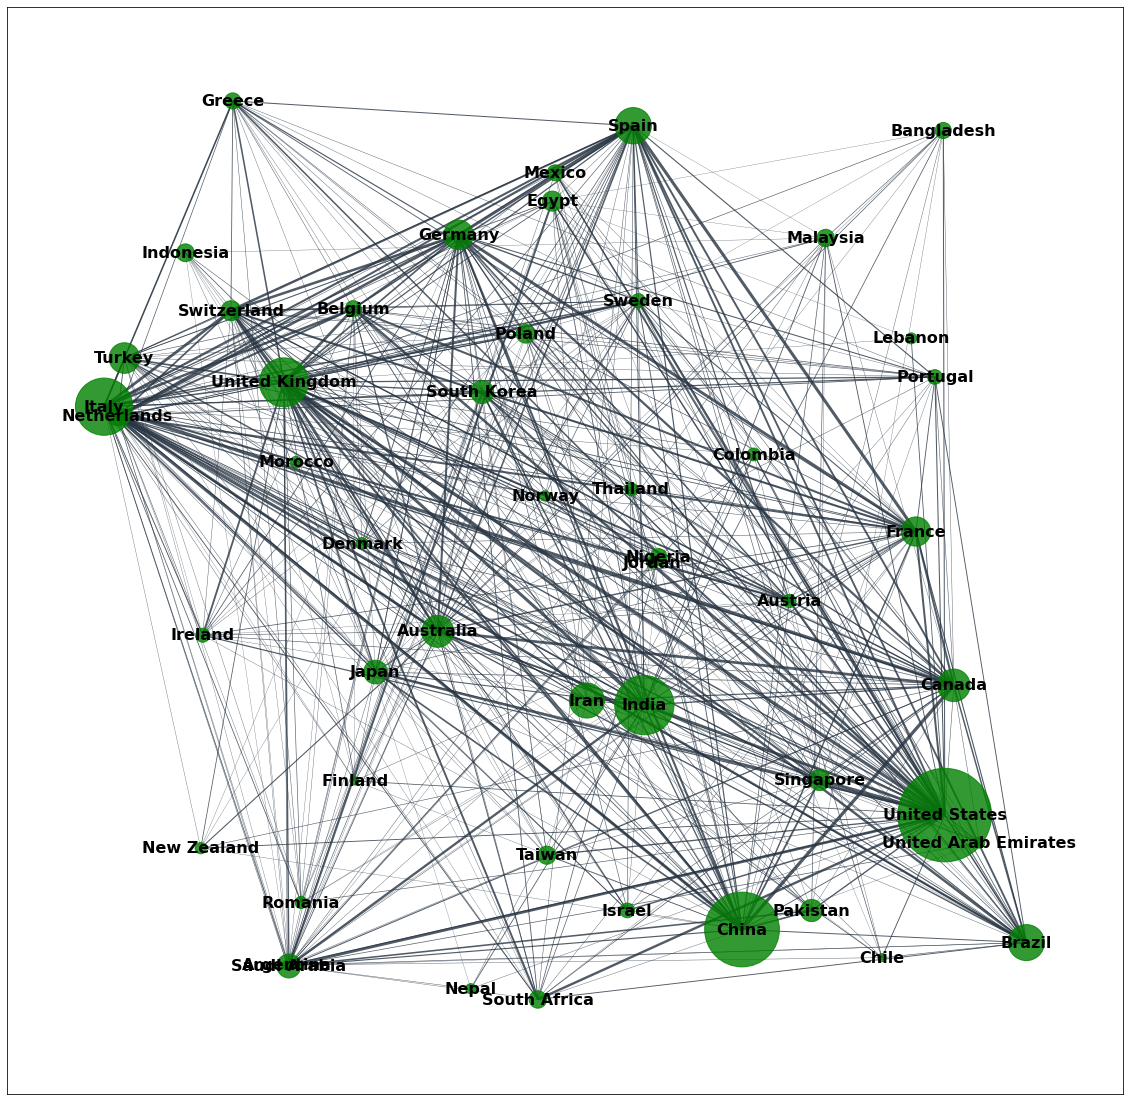

In [75]:
plot_countrycollaboration()

## Keyword co-occurrence networks

### plot_cooccurrence

In [72]:
def plot_cooccurrence():
        #Add nodes
        plt.clf()
        plt.figure(figsize=(20,20))    
        G = nx.Graph() #Create a graph object called G
        node_list = b
        for node in node_list:
            G.add_node(node)

        pos=nx.spring_layout(G, k=0.42, iterations=17) 
        nx.draw_networkx_nodes(G, pos = pos, node_color = 'r', alpha = 0.8, node_size = [area_dict[s] for s in G.nodes()])

        # adding labels to nodes
        labels = {}
        for node_name in node_list:
            labels[str(node_name)] =str(node_name)
        nx.draw_networkx_labels(G,pos,labels,font_size=16)


        #Adding the edges
        for ind in a.index:
            G.add_edge(a['source'][ind],a['target'][ind],weight=a['weight'][ind])

        all_weights = []
        #Iterate through the graph nodes to gather all the weights
        for (node1,node2,data) in G.edges(data=True):
            all_weights.append(data['weight']) #we'll use this when determining edge thickness

        #Get unique weights
        unique_weights = list(set(all_weights))

        #Plot the edges
        for weight in unique_weights:
            weighted_edges = 2*[(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
            width = weight*len(node_list)*3.0/sum(all_weights)
            nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


    #Plot the graph
plt.show()


<Figure size 432x288 with 0 Axes>

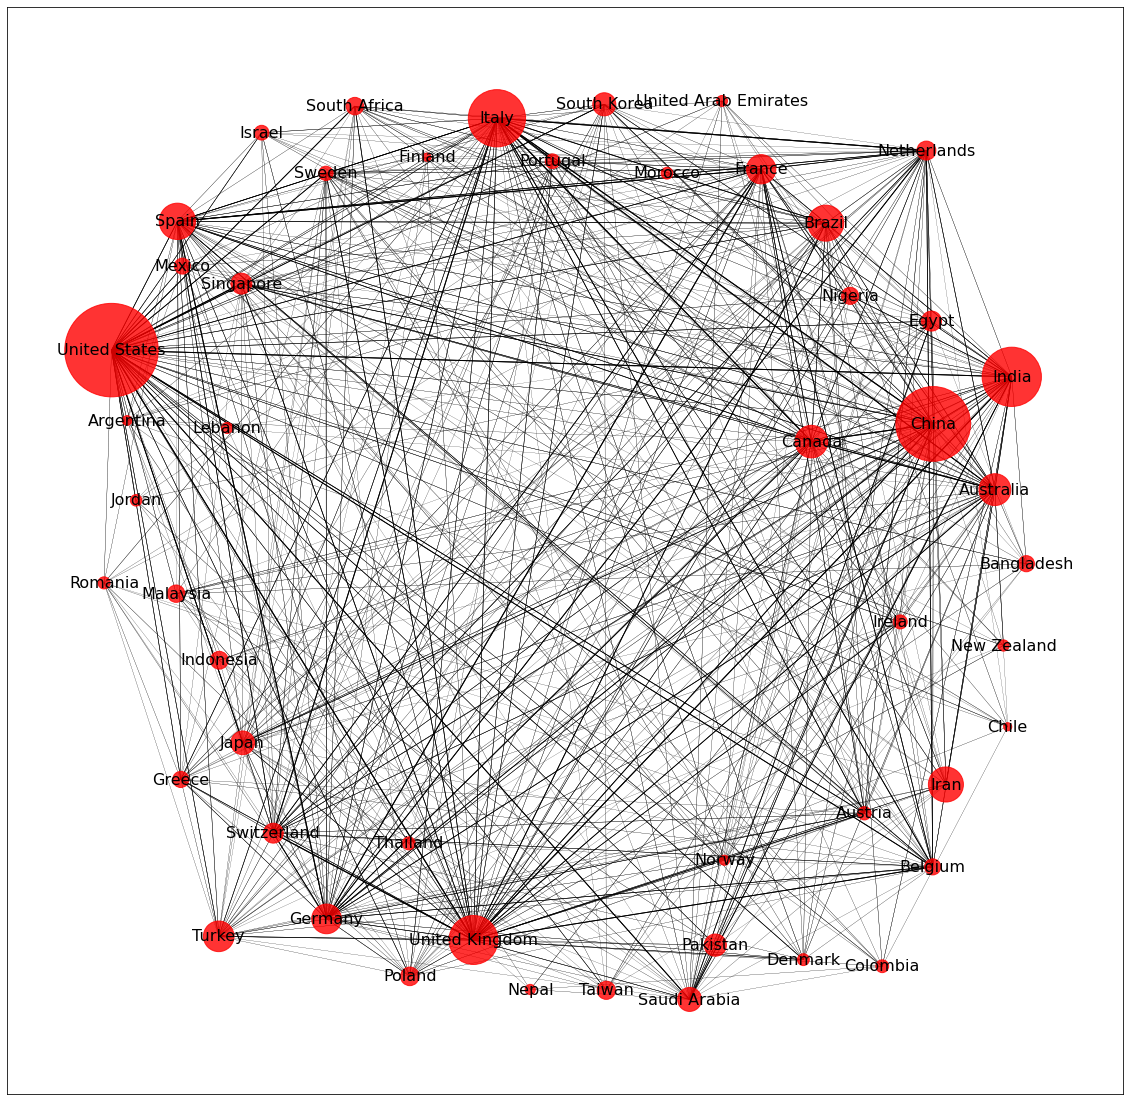

In [73]:
plot_cooccurrence()

In [60]:
countrydf2=countrydf2.sort_values(by=['Article Count'], ascending=False)
countrys=countrydf2.head(50).index


for ind in range(len(tlist)):
    tlist[ind]=uniquel(tlist[ind])
    tlist[ind]=[value for value in tlist[ind] if value in countrys] 


for ind in range(len(tlist)):
    tlist[ind]=[value for value in tlist[ind] if value in countries] 


u = pd.get_dummies(pd.DataFrame(tlist), prefix='', prefix_sep='').sum(level=0, axis=1)

v = u.T.dot(u)
v.values[np.tril(np.ones(v.shape)).astype(np.bool)] = 0


a = v.stack()
a = a[a >= 1].rename_axis(('source', 'target')).reset_index(name='weight')

for ind in a.index:
    if(a['weight'][ind]<=20):
        a.drop([ind],inplace = True)

a=a.sort_values(by=['weight'], ascending=False)

b=a['source']
b=b.append(a['target'])
b=uniquel(b)


area_dict = dict(zip(countrydf.Name, countrydf['Article Count']))

C:\Users\13412\AppData\Local\Temp\ipykernel_29496\79248180.py:14: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  u = pd.get_dummies(pd.DataFrame(tlist), prefix='', prefix_sep='').sum(level=0, axis=1)
C:\Users\13412\AppData\Local\Temp\ipykernel_29496\79248180.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v.values[np.tril(np.ones(v.shape)).astype(np.bool)] = 0
C:\Users\13412\AppData\Local\Temp\ipykernel_29496\79248180.py:30: FutureWarning: The series.append method is deprecated and will be removed from p

In [ ]:
plot()